In [1]:
#importing
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
import keras
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

2024-08-09 15:33:28.049007: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
MLP_distances_all_data = []

/home/ni/Downloads/Geant4 Data/output_nt_Hits_1mm.csv


2024-08-09 15:33:29.732001: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-08-09 15:33:29.735526: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-08-09 15:33:29.742402: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_SYSTEM_DRIVER_MISMATCH: system has unsupported display driver / cuda driver combination
2024-08-09 15:33:29.742414: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ni-MS-7D75
2024-08-09 15:33:29.742418: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ni-MS-7D75
2024-08-09 15:33:29.742529: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 535.183.6
2024-08-09 15:33:29.742542: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: Not found: could not fi

Average MLP Distance (mm): 0.006610145682976565
Median MLP Distance (mm): 0.0


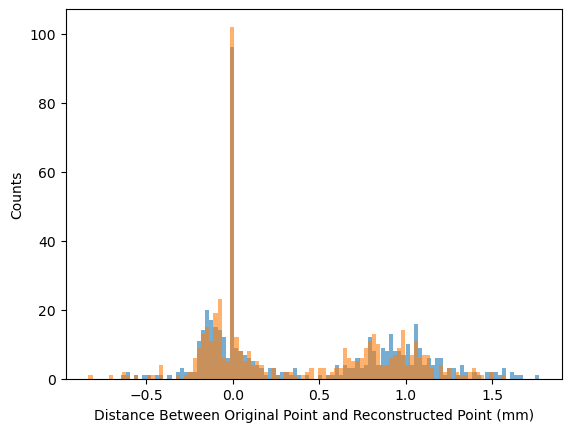

/home/ni/Downloads/Geant4 Data/output_nt_Hits_2mm.csv
Average MLP Distance (mm): -0.02939418148554017
Median MLP Distance (mm): 0.0


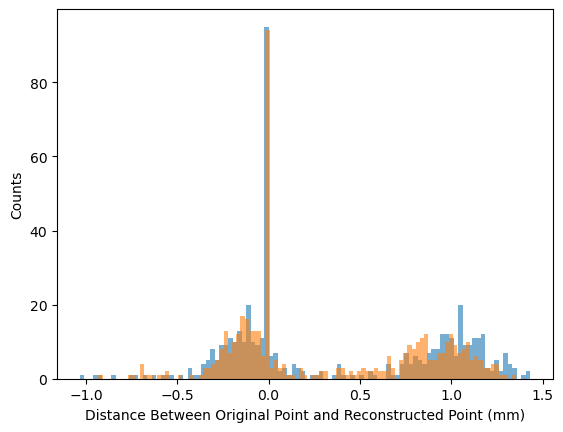

/home/ni/Downloads/Geant4 Data/output_nt_Hits_3mm.csv
Average MLP Distance (mm): 0.01011296448486969
Median MLP Distance (mm): 0.0


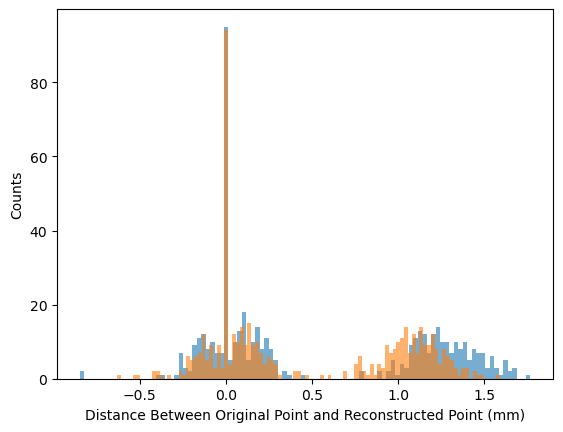

/home/ni/Downloads/Geant4 Data/output_nt_Hits_4mm.csv
Average MLP Distance (mm): 0.00406074492373341
Median MLP Distance (mm): 0.0


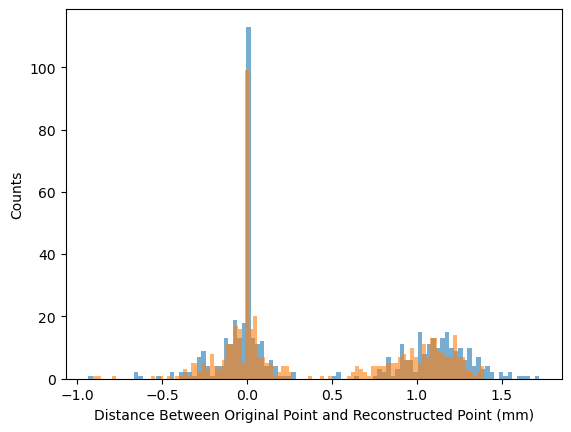

/home/ni/Downloads/Geant4 Data/output_nt_Hits_5mm.csv
Average MLP Distance (mm): 0.029909997125584124
Median MLP Distance (mm): 0.0


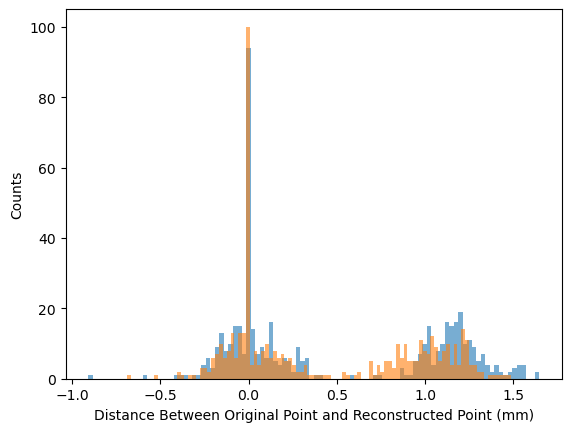

/home/ni/Downloads/Geant4 Data/output_nt_Hits_6mm.csv
Average MLP Distance (mm): -0.0031100449709713252
Median MLP Distance (mm): 0.0


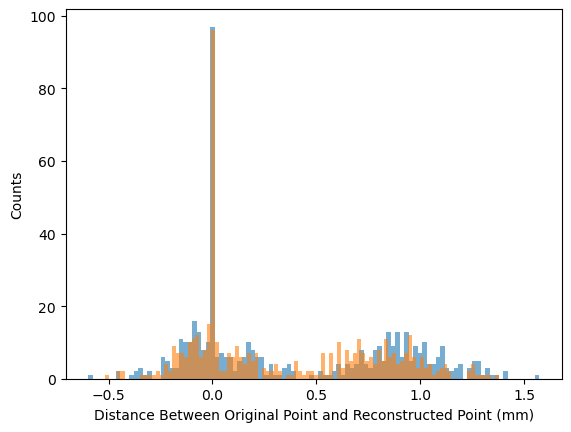

/home/ni/Downloads/Geant4 Data/output_nt_Hits_7mm.csv
Average MLP Distance (mm): -0.0166847646336998
Median MLP Distance (mm): 0.0


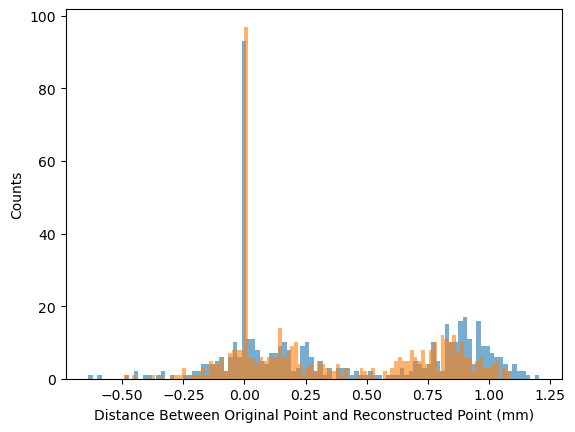

/home/ni/Downloads/Geant4 Data/output_nt_Hits_8mm.csv
Average MLP Distance (mm): 0.007277758094226498
Median MLP Distance (mm): 0.0


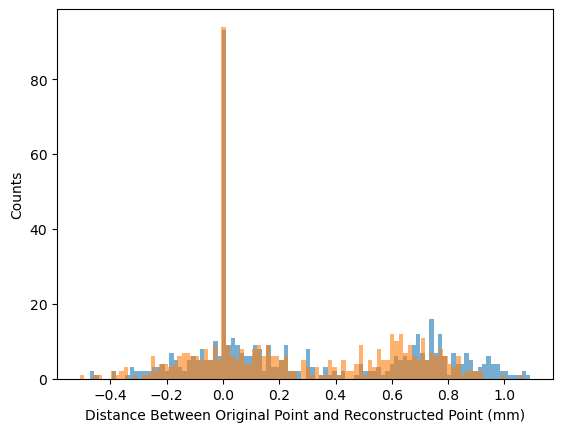

/home/ni/Downloads/Geant4 Data/output_nt_Hits_9mm.csv
Average MLP Distance (mm): 0.011701728752238991
Median MLP Distance (mm): 0.0


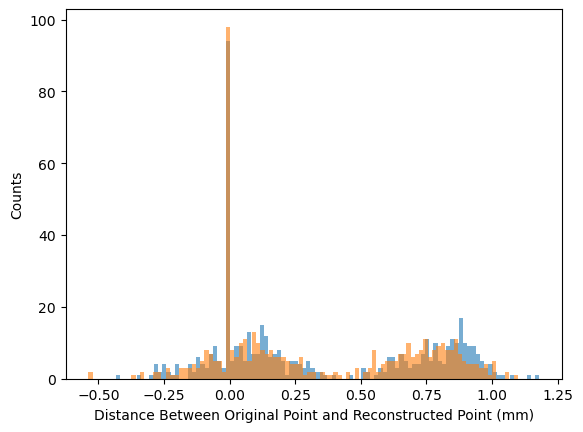

/home/ni/Downloads/Geant4 Data/output_nt_Hits_10mm.csv
Average MLP Distance (mm): -0.006799743569399073
Median MLP Distance (mm): 0.0


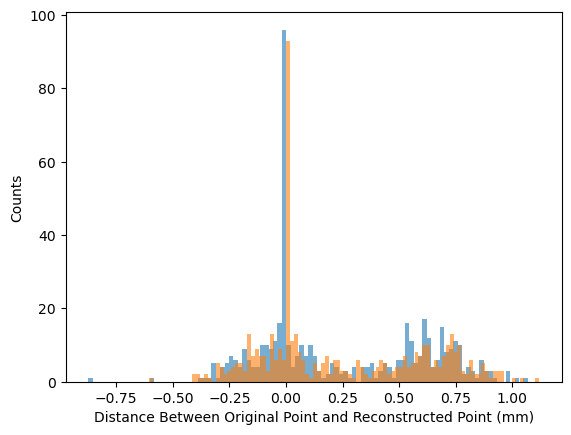

/home/ni/Downloads/Geant4 Data/output_nt_Hits_11mm.csv
Average MLP Distance (mm): 0.009915428205195333
Median MLP Distance (mm): 0.0


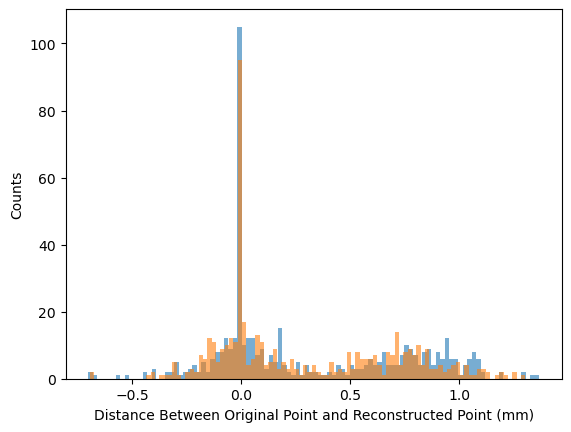

/home/ni/Downloads/Geant4 Data/output_nt_Hits_12mm.csv
Average MLP Distance (mm): -0.026146371355902063
Median MLP Distance (mm): 0.0


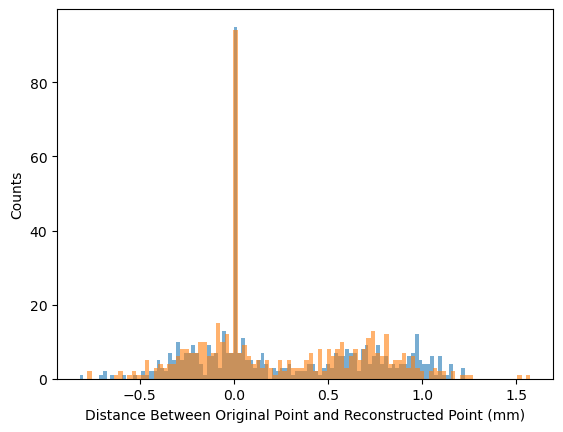

/home/ni/Downloads/Geant4 Data/output_nt_Hits_13mm.csv
Average MLP Distance (mm): -0.006491991948084328
Median MLP Distance (mm): 0.0


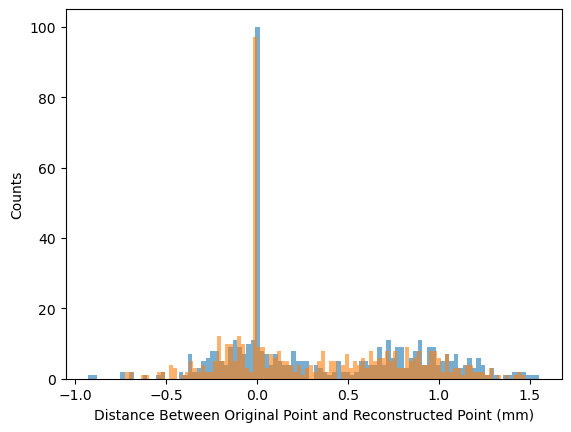

/home/ni/Downloads/Geant4 Data/output_nt_Hits_14mm.csv
Average MLP Distance (mm): -0.0036108026616977896
Median MLP Distance (mm): 0.0


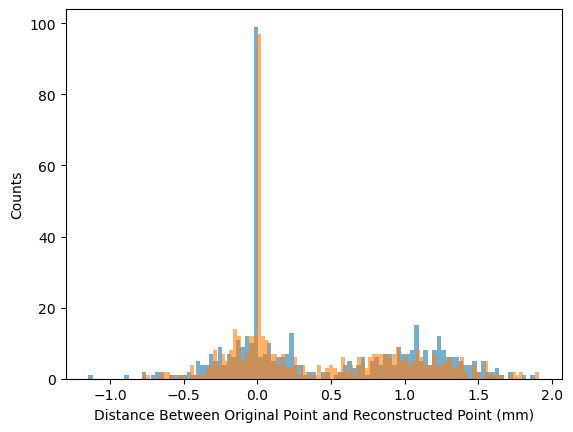

/home/ni/Downloads/Geant4 Data/output_nt_Hits_15mm.csv
Average MLP Distance (mm): -0.016313845186928775
Median MLP Distance (mm): 0.0


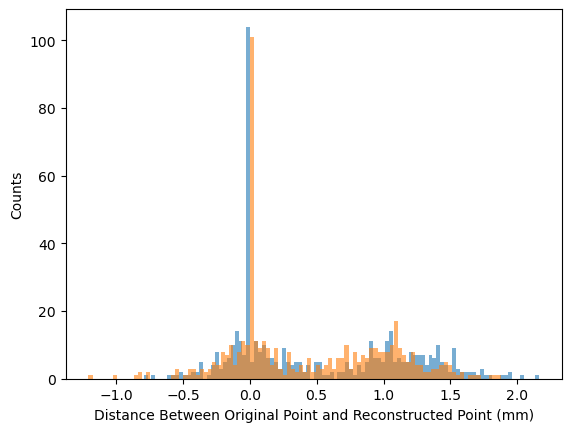

In [3]:
numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for q in numbers:
    #getting X data
    #file = open('/content/drive/MyDrive/output_nt_Hits_1_layer_5mm.csv')
    file = open('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    print('/home/ni/Downloads/Geant4 Data/output_nt_Hits_' + str(q) + 'mm.csv')
    csvreader = csv.reader(file)
    #first 13 rows aren't needed
    line_count = 0;
    original_X = []
    for row in csvreader:
      if line_count >= 13:
        original_X.append([int(i) for i in row])
      line_count += 1
    
    
    #getting Y data
    original_y = []
    for i in range(-122, 1):
      for j in range(-122, 1):
        original_y.append([i*0.2, j*0.2])
    
    #reconstructing
    size = 100
    num_X = np.array(original_X).reshape(123,123,9)
    num_y = np.array(original_y).reshape(123,123,2)
    num_X = num_X[122-size:,122-size:,:]
    num_y = num_y[122-size:,122-size:,:]
    bottom_right_X = []
    bottom_right_y = []
    for i in range(-size, 0):
      for j in range(-size, 1):
        tmp_X = copy.deepcopy(num_X[i+size][j+size])
        tmp_y = copy.deepcopy(num_y[i+size][j+size])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        bottom_right_X.append(tmp_X)
        bottom_right_y.append(tmp_y)
    
    bottom_right_X = np.array(bottom_right_X).reshape(size,size+1,9)
    bottom_right_y = np.array(bottom_right_y).reshape(size,size+1,2)
    
    top_left_X = []
    top_left_y = []
    for i in range(-size, 1):
      for j in range(-size, 0):
        tmp_X = copy.deepcopy(num_X[i+size][j+size])
        tmp_y = copy.deepcopy(num_y[i+size][j+size])
        #mirroring
        tmp_y[1] = -tmp_y[1]
        for k in range(3):
          tmp_X[k], tmp_X[k+3*2] = tmp_X[k+3*2], tmp_X[k]
        top_left_X.append(tmp_X)
        top_left_y.append(tmp_y)
    
    top_left_X = np.array(top_left_X).reshape(size+1,size,9)
    top_left_y = np.array(top_left_y).reshape(size+1,size,2)
    
    top_right_X = []
    top_right_y = []
    for i in range(-size, 0):
      for j in range(-size, 0):
        tmp_X = copy.deepcopy(top_left_X[i+size][j+size])
        tmp_y = copy.deepcopy(top_left_y[i+size][j+size])
        #mirroring
        tmp_y[0] = -tmp_y[0]
        for k in range(3):
          tmp_X[3*k], tmp_X[3*k+2] = tmp_X[3*k+2], tmp_X[3*k]
        top_right_X.append(tmp_X)
        top_right_y.append(tmp_y)
    
    top_right_X = np.array(top_right_X).reshape(size,size,9)
    top_right_y = np.array(top_right_y).reshape(size,size,2)
    
    #converting to numpy array
    X = np.concatenate((num_X.reshape((size + 1) * (size + 1), 9), bottom_right_X.reshape(size * (size + 1), 9), top_left_X.reshape(size * (size + 1), 9), top_right_X.reshape(size * size, 9)))
    y = np.concatenate((num_y.reshape((size + 1) * (size + 1), 2), bottom_right_y.reshape(size * (size + 1), 2), top_left_y.reshape(size * (size + 1), 2), top_right_y.reshape(size * size, 2)))
    
    #training
    MLP_distances = np.zeros((245,245,2))
    scaler = StandardScaler()
    for k in range(10):
        X_MLP = scaler.fit_transform(X)
        X_train, X_val, y_train, y_val = train_test_split(X_MLP, y, test_size=0.3)
    
        model = Sequential()
        model.add(Dense(128, input_dim=9, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(2, activation='linear'))
    
        model.compile(optimizer='adam', loss='mean_squared_error')
     
        history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    
        #finding distances
        yhat = model.predict(X_MLP)
        for i in range(len(X)):
            #finding average of each point
            MLP_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][0] = k / (k + 1) * MLP_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][0] + 1 / (k + 1) * (yhat[i][0] - y[i][0])
            MLP_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][1] = k / (k + 1) * MLP_distances[size+round(y[i][0]*5)][size-round(y[i][1]*5)][1] + 1 / (k + 1) * (yhat[i][1] - y[i][1])
    
    print("Average MLP Distance (mm): " + str(np.average(MLP_distances)))
    print("Median MLP Distance (mm): " + str(np.median(MLP_distances)))

    plt.hist(MLP_distances[:][:][0].ravel(), bins=100, alpha=0.6, label='delta X')
    plt.hist(MLP_distances[:][:][1].ravel(), bins=100, alpha=0.6, label='delta Y')
    plt.xlabel('Distance Between Original Point and Reconstructed Point (mm)')
    plt.ylabel('Counts')
    plt.show()

    MLP_distances_all_data.append(MLP_distances)

In [4]:
MLP_distances_all_data_np = np.array(MLP_distances_all_data)
np.savetxt('MLP_distances_delta_cut.csv', MLP_distances_all_data_np.reshape(MLP_distances_all_data_np.shape[0], -1))

#print(MLP_distances_all_data_np.shape)